<a href="https://colab.research.google.com/github/Shujaat123/COE691_XAI/blob/main/Diffusion_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install diffusers transformers accelerate torch torchvision


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


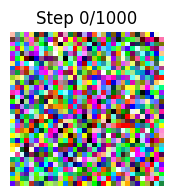

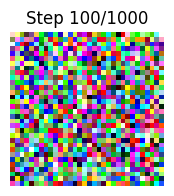

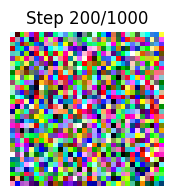

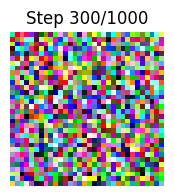

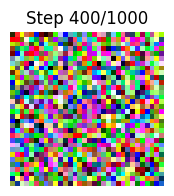

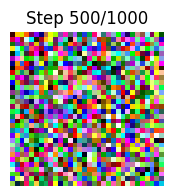

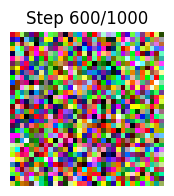

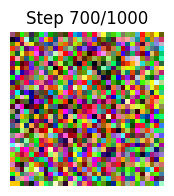

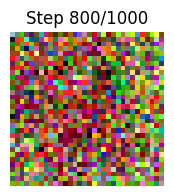

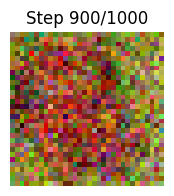

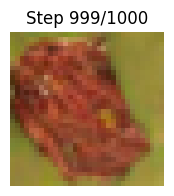

In [3]:
from diffusers import DDPMPipeline
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# -----------------------------
# 1. Load pipeline
# -----------------------------
model_id = "google/ddpm-cifar10-32"
pipe = DDPMPipeline.from_pretrained(model_id)
pipe.to("cuda" if torch.cuda.is_available() else "cpu")
device = pipe.device

# -----------------------------
# 2. Set number of steps
# -----------------------------
num_inference_steps = 1000   # or e.g. 250
pipe.scheduler.set_timesteps(num_inference_steps)

# start from pure noise
x = torch.randn(1, 3, 32, 32, device=device)

# -----------------------------
# 3. Sampling loop with visualization
# -----------------------------
for i, t in enumerate(pipe.scheduler.timesteps):
    with torch.no_grad():
        noise_pred = pipe.unet(x, t).sample

    x = pipe.scheduler.step(noise_pred, t, x).prev_sample

    # visualize every 100 steps (and at the last one)
    if (i % 100 == 0) or (i == len(pipe.scheduler.timesteps) - 1):
        img = (x.clamp(-1, 1) + 1) / 2.0   # [-1,1] -> [0,1]
        grid = make_grid(img, nrow=1)

        np_img = grid.permute(1, 2, 0).detach().cpu().numpy()

        # clear_output(wait=True)           # replace previous plot
        plt.figure(figsize=(2, 2))
        plt.imshow(np_img)
        plt.axis("off")
        plt.title(f"Step {i}/{num_inference_steps}")
        display(plt.gcf())
        plt.close()

# x now contains the final sample
